In [49]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import warnings
warnings.simplefilter('ignore')

In [39]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [40]:
print(os.path.exists("/content/drive/MyDrive/SS/weatherAUS_modf.csv"))

True


In [52]:
ds = pd.read_csv("/content/drive/MyDrive/SS/weatherAUS_modf.csv")

In [53]:
X = ds.drop(['RainTomorrow'], axis=1)
Y = ds['RainTomorrow']

In [54]:


smote = SMOTE(random_state=68)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [55]:


X_train, X_rem, Y_train, Y_rem = train_test_split(X_resampled, Y_resampled, train_size=0.8, stratify=Y_resampled, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5, stratify=Y_rem, random_state=0)

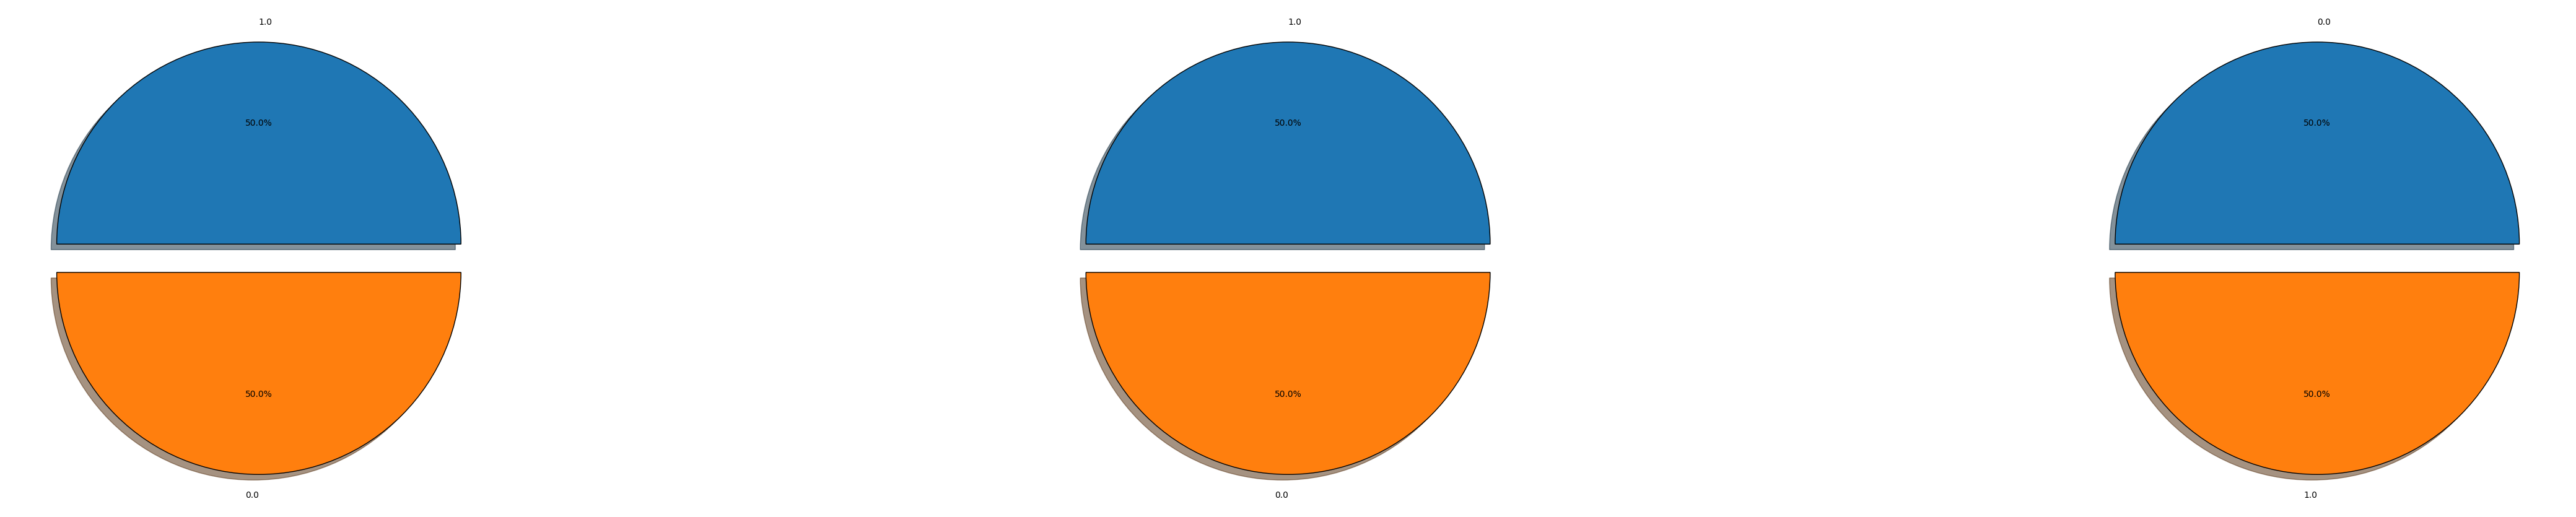

In [45]:
for i, y_set in enumerate([Y_train, Y_valid, Y_test]):
    plt.subplot(6, 3, i + 1)
    plt.rcParams["figure.figsize"] = (50, 50)
    labels = y_set.astype('str').unique().tolist()
    slices = [y_set.astype('str').value_counts()[i] for i in labels]
    plt.pie(slices, labels=labels, explode=[0.07 for i in range(len(labels))], wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
    plt.tight_layout()

In [56]:


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     10014
         1.0       0.91      0.92      0.92     10014

    accuracy                           0.91     20028
   macro avg       0.91      0.91      0.91     20028
weighted avg       0.91      0.91      0.91     20028



In [50]:


%%time
# Create the random grid
param_grid = {'n_estimators': np.arange(25,55,10),
               'max_features': [0.5, 0.6, 0.8],
               'min_samples_split': [10,15],
               'min_samples_leaf': [3,4],
               'bootstrap': [False]}

# print(random_grid)


rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    verbose = 3,
                    return_train_score=True)

grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.997, test=0.909) total time=  43.2s
[CV 2/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.997, test=0.906) total time=  46.4s
[CV 3/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.997, test=0.910) total time=  42.0s
[CV 4/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.997, test=0.910) total time=  40.4s
[CV 5/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.997, test=0.910) total time=  41.6s
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=35;, score=(train=0.997, test=0.910) tot

In [51]:
best_n_estimators = grid.best_params_['n_estimators']
best_max_features = grid.best_params_['max_features']
best_min_samples_split = grid.best_params_['min_samples_split']
best_min_samples_leaf = grid.best_params_['min_samples_leaf']

best_rf_model = RandomForestClassifier(n_estimators = best_n_estimators,
                                       max_features = best_max_features,
                                       min_samples_split = best_min_samples_split,
                                       min_samples_leaf = best_min_samples_leaf)

best_rf_model.fit(X_train, Y_train)
Y_pred = best_rf_model.predict(X_test)

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     10014
         1.0       0.91      0.90      0.91     10014

    accuracy                           0.91     20028
   macro avg       0.91      0.91      0.91     20028
weighted avg       0.91      0.91      0.91     20028

